In [1]:
%matplotlib inline

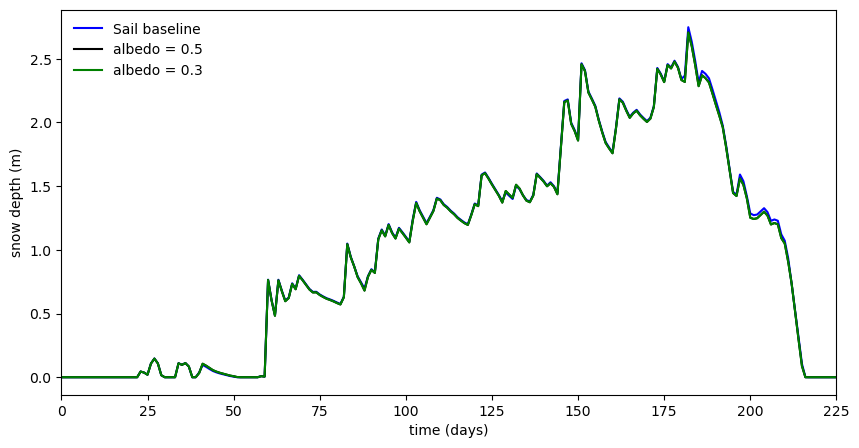

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime
import h5py

sail_baseline = np.loadtxt("../Sail_tests/Sail_baseline/snow_status.dat",delimiter=",")
sail_alb = np.loadtxt("../Sail_tests/Sail_low_albedo/snow_status.dat",delimiter=",")
sail_lower = np.loadtxt("../Sail_tests/Sail_lower_albedo/snow_status.dat",delimiter=",")
sd = np.loadtxt('./misery.csv',delimiter=',',dtype=str)

time = sail_baseline[:,0]/86400
#t_phen = phen_alb[:,0]/86400
#sd_int = int_alb[:,1]
#sd_low = low_alb[:,1]
sd_base = sail_baseline[:,1]
sd_low = sail_alb[:,1]
sd_lower = sail_alb[:,1]

fig1 = plt.figure(figsize=(10,5))
plt.plot(time,sd_base,color='b', label="Sail baseline")
plt.plot(time,sd_low,color='k', label="albedo = 0.5")
plt.plot(time,sd_lower,color='g', label="albedo = 0.3")
plt.legend(frameon=False)
plt.xlabel("time (days)")
plt.ylabel("snow depth (m)")
plt.xlim([0.0,225.0])
plt.show()


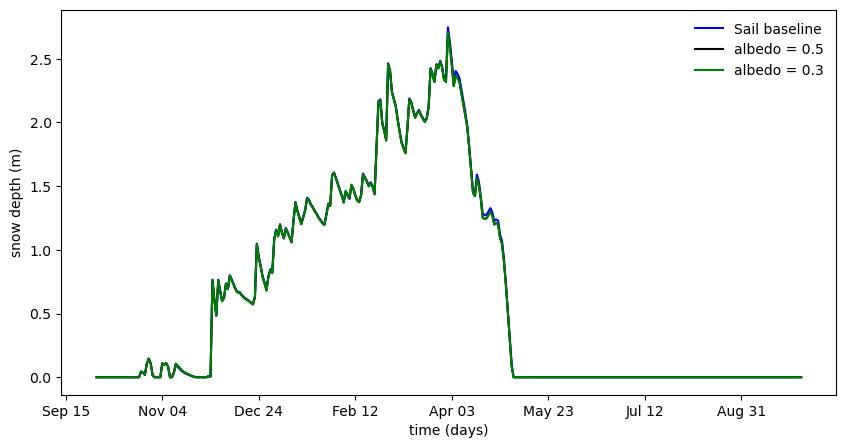

In [5]:
oct_1st = datetime(2022,10,1)
oct_1st_mdates = mdates.date2num(oct_1st)
dates_mdates = oct_1st_mdates + time

fig1 = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(dates_mdates,sd_base,color='b', label="Sail baseline")
plt.plot(dates_mdates,sd_low,color='k', label="albedo = 0.5")
plt.plot(dates_mdates,sd_lower,color='g', label="albedo = 0.3")
plt.legend(frameon=False)
plt.xlabel("time (days)")
plt.ylabel("snow depth (m)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#plt.xlim([0.0,225.0])
plt.show()

In [6]:
gothic = pd.read_csv('./Gothic_obs_fix.csv')

In [7]:
gothic_time = pd.to_datetime(gothic['date'])

sd = np.loadtxt('./misery.csv',delimiter=',',dtype=str)
depth = np.asarray(sd[:,1], dtype=float)
ttest = pd.to_datetime(sd[:,0])

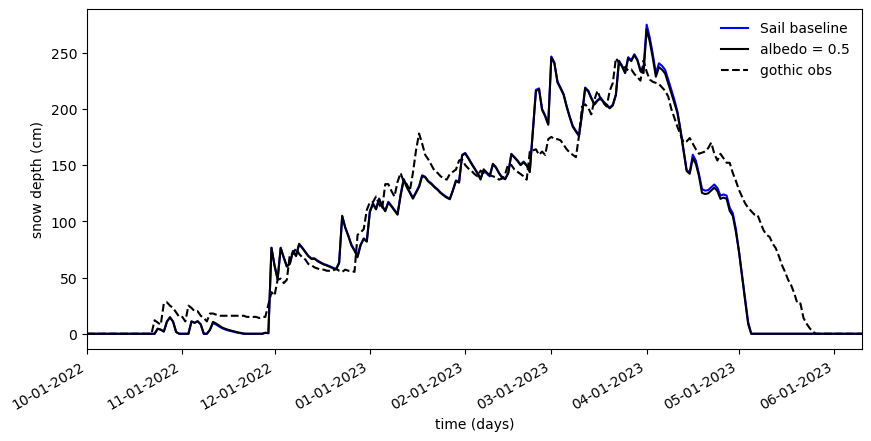

In [8]:
fig3 = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(dates_mdates,sd_base*100.0,color='b', label="Sail baseline")
plt.plot(dates_mdates,sd_low*100.0,color='k', label="albedo = 0.5")
#plt.plot(dates_mdates,sd_lower*100.0,color='g', label="albedo = 0.3")
plt.plot(ttest, depth,linestyle='--', color='k', label="gothic obs")
plt.legend(frameon=False)
plt.xlabel("time (days)")
plt.ylabel("snow depth (cm)")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
fig3.autofmt_xdate()
# Set the x-axis limits
start_date = datetime(2022, 10, 1)
end_date = datetime(2023, 6, 10)

ax.set_xlim(mdates.date2num(start_date), mdates.date2num(end_date))
plt.show()

In [3]:
f_weather = h5py.File('../ATS-EcoSIM-demos/data/sail_forcing_seprate_precip.h5')

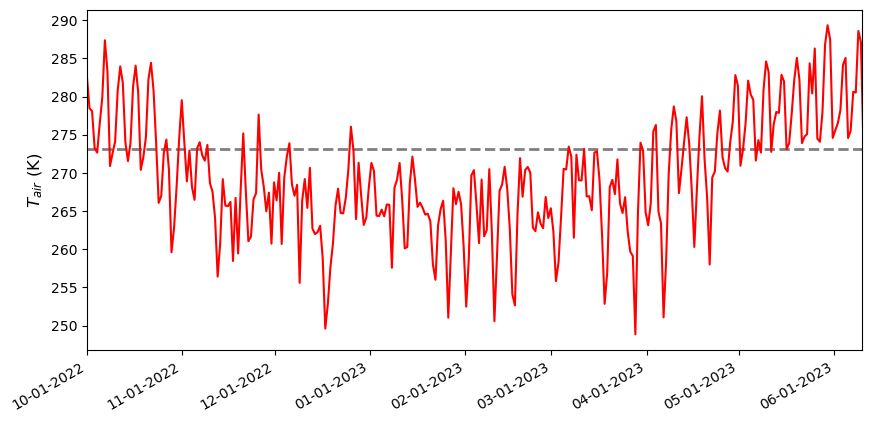

In [30]:
f_weather.keys()
t_weather = f_weather['time [s]'][::20]/86400.0
T_air = f_weather['air temperature [K]'][::20]

tweather_mdates = oct_1st_mdates + t_weather

fig4 = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot([mdates.date2num(start_date), mdates.date2num(end_date)],[273.15,273.15],color='k',lw=2,alpha=0.5,linestyle='--')
plt.plot(tweather_mdates,T_air,color='r')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
fig4.autofmt_xdate()
# Set the x-axis limits
start_date = datetime(2022, 10, 1)
end_date = datetime(2023, 6, 10)
plt.ylabel('$T_{air}$ (K)',fontsize=12)
ax.set_xlim(mdates.date2num(start_date), mdates.date2num(end_date))
plt.show()


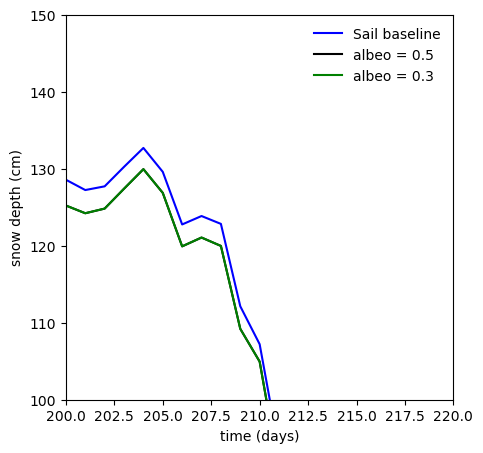

In [12]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(time,sd_base*100.0,color='b', label="Sail baseline")
plt.plot(time,sd_low*100.0,color='k', label="albeo = 0.5")
plt.plot(time,sd_lower*100.0,color='g', label="albeo = 0.3")
plt.xlim([200,220])
plt.ylim([100,150])
plt.legend(frameon=False)
plt.xlabel("time (days)")
plt.ylabel("snow depth (cm)")
plt.show()


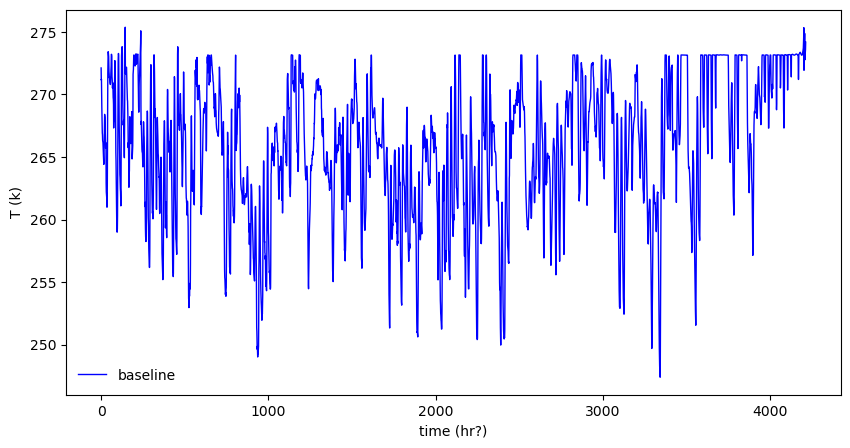

In [20]:
E_base = np.loadtxt('../Sail_tests/Sail_baseline/snow_debug.txt')
E_alb = np.loadtxt('../Sail_tests/Sail_low_albedo/snow_debug.txt')
E_lower = np.loadtxt('../Sail_tests/Sail_lower_albedo/snow_debug.txt')

#time = int_alb[:,0]/86400
T_base = E_base[:,0]
T_alb = E_alb[:,0]
T_lower = E_lower[:,0]

fig3 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),T_base,color='b',lw=1, label="baseline")
#plt.plot(range(len(T_alb)),T_alb,color='k',lw=1, label="albedo=0.5")
#plt.plot(range(len(T_lower)),T_lower,color='g',lw=1, label="albedo=0.3")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("T (k)")
plt.show()

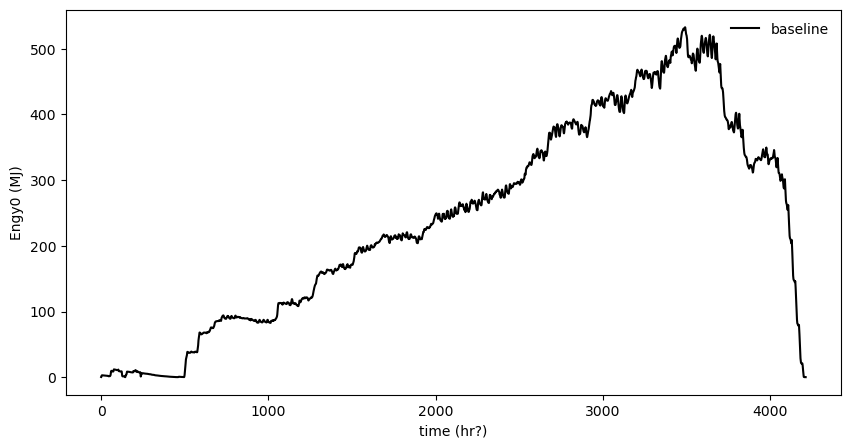

In [24]:
fig4 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),E_base[:,1],color='k', label="baseline")
#plt.plot(range(len(T_alb)),E_alb[:,1],color='g', label="albedo=0.5")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("Engy0 (MJ)")
plt.show()

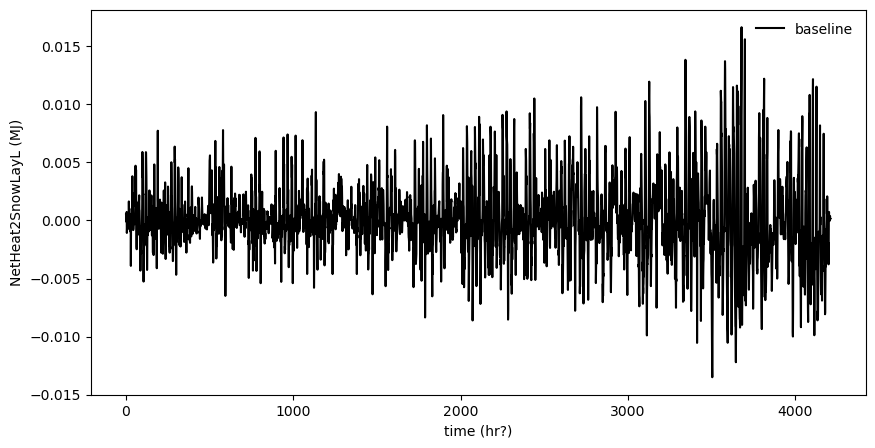

In [25]:
fig5 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),E_base[:,2],color='k', label="baseline")
#plt.plot(range(len(T_phen)),energy_phen[:,2],color='g', label="Phenology")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("NetHeat2SnowLayL (MJ)")
plt.show()

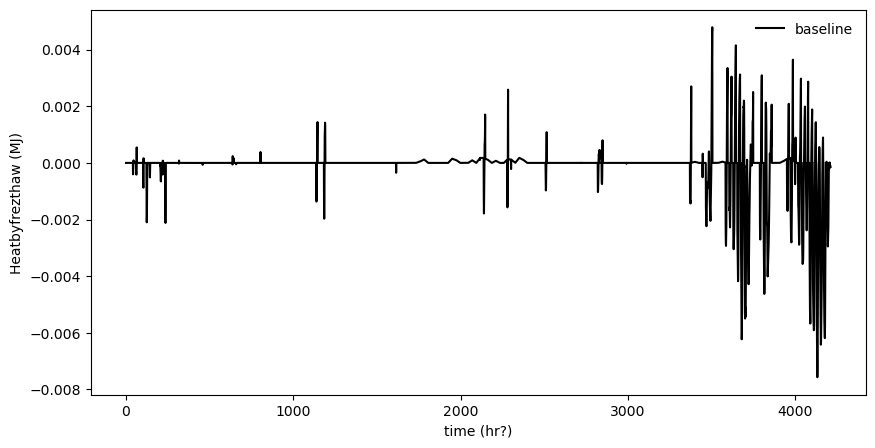

In [26]:
fig6 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),E_base[:,3],color='k', label="baseline")
#plt.plot(range(len(T_phen)),energy_phen[:,3],color='g', label="Phenology")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("Heatbyfrezthaw (MJ)")
plt.show()